In [3]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb


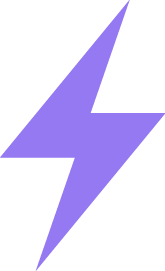

Running local mode, some functionality limited.



In [5]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [6]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [7]:
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2.csv')
latlong = pd.read_csv('simplemaps-worldcities-basic.csv')

In [8]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [9]:
latlong.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan


In [10]:
pop = pop[['Country Code','2016']]
df = pd.merge(pop, latlong, left_on='Country Code', right_on='iso3')

In [11]:
df.head()

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,ABW,104822.0,Oranjestad,Oranjestad,12.530384,-70.028992,50887.5,Aruba,AW,ABW,NaN
1,AFG,34656032.0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
2,AFG,34656032.0,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
3,AFG,34656032.0,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
4,AFG,34656032.0,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz


df.to_csv('world.csv')

In [12]:
index = df['city'] + ', ' + df['country']
df

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,ABW,104822.0,Oranjestad,Oranjestad,12.530384,-70.028992,50887.5,Aruba,AW,ABW,NaN
1,AFG,34656032.0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
2,AFG,34656032.0,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
3,AFG,34656032.0,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
4,AFG,34656032.0,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
5,AFG,34656032.0,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan
6,AFG,34656032.0,Zareh Sharan,Zareh Sharan,32.850000,68.416705,13737.0,Afghanistan,AF,AFG,Paktika
7,AFG,34656032.0,Asadabad,Asadabad,34.866000,71.150005,48400.0,Afghanistan,AF,AFG,Kunar
8,AFG,34656032.0,Taloqan,Taloqan,36.729999,69.540004,64256.0,Afghanistan,AF,AFG,Takhar
9,AFG,34656032.0,Mahmud-E Eraqi,Mahmud-E Eraqi,35.016696,69.333301,7407.0,Afghanistan,AF,AFG,Kapisa


In [13]:
index.head()

0             Oranjestad, Aruba
1    Qal eh-ye Now, Afghanistan
2      Chaghcharan, Afghanistan
3      Lashkar Gah, Afghanistan
4           Zaranj, Afghanistan
dtype: object

In [14]:
df.index = index
df

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
"Oranjestad, Aruba",ABW,104822.0,Oranjestad,Oranjestad,12.530384,-70.028992,50887.5,Aruba,AW,ABW,NaN
"Qal eh-ye Now, Afghanistan",AFG,34656032.0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
"Chaghcharan, Afghanistan",AFG,34656032.0,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
"Lashkar Gah, Afghanistan",AFG,34656032.0,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
"Zaranj, Afghanistan",AFG,34656032.0,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
"Tarin Kowt, Afghanistan",AFG,34656032.0,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan
"Zareh Sharan, Afghanistan",AFG,34656032.0,Zareh Sharan,Zareh Sharan,32.850000,68.416705,13737.0,Afghanistan,AF,AFG,Paktika
"Asadabad, Afghanistan",AFG,34656032.0,Asadabad,Asadabad,34.866000,71.150005,48400.0,Afghanistan,AF,AFG,Kunar
"Taloqan, Afghanistan",AFG,34656032.0,Taloqan,Taloqan,36.729999,69.540004,64256.0,Afghanistan,AF,AFG,Takhar
"Mahmud-E Eraqi, Afghanistan",AFG,34656032.0,Mahmud-E Eraqi,Mahmud-E Eraqi,35.016696,69.333301,7407.0,Afghanistan,AF,AFG,Kapisa


In [15]:
northamerica = ['CA', 'US', 'MX']
usa = df[df['iso2'].isin(northamerica)]
X = usa[['lng','lat']]
y = usa['lat']
x = usa['lng']
labels = usa['city']
usa.sort_values('pop', ascending = False)

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
"Mexico City, Mexico",MEX,127540423.0,Mexico City,Mexico City,19.442442,-99.130988,14919501.0,Mexico,MX,MEX,Distrito Federal
"New York, United States of America",USA,323127513.0,New York,New York,40.749979,-73.980017,13524139.0,United States of America,US,USA,New York
"Los Angeles, United States of America",USA,323127513.0,Los Angeles,Los Angeles,33.989978,-118.179980,8097410.0,United States of America,US,USA,California
"Chicago, United States of America",USA,323127513.0,Chicago,Chicago,41.829991,-87.750055,5915976.0,United States of America,US,USA,Illinois
"Toronto, Canada",CAN,36286425.0,Toronto,Toronto,43.699980,-79.420021,4573710.5,Canada,CA,CAN,Ontario
"Houston, United States of America",USA,323127513.0,Houston,Houston,29.819974,-95.339979,4053287.0,United States of America,US,USA,Texas
"Philadelphia, United States of America",USA,323127513.0,Philadelphia,Philadelphia,39.999973,-75.169996,3504775.0,United States of America,US,USA,Pennsylvania
"Montréal, Canada",CAN,36286425.0,Montréal,Montréal,45.499999,-73.583297,3017278.0,Canada,CA,CAN,Québec
"Dallas, United States of America",USA,323127513.0,Dallas,Dallas,32.820024,-96.840017,3004852.0,United States of America,US,USA,Texas
"Miami, United States of America",USA,323127513.0,Miami,Miami,25.787611,-80.224106,2983947.0,United States of America,US,USA,Florida


In [16]:
lgn.scatter(x, y, labels = usa['city'])

Silhouette Coefficient: -0.327
Estimated number of clusters: 32
Homogeneity: 0.120
Completeness: 0.999
V-measure: 0.215
[ True  True  True ...,  True  True  True]


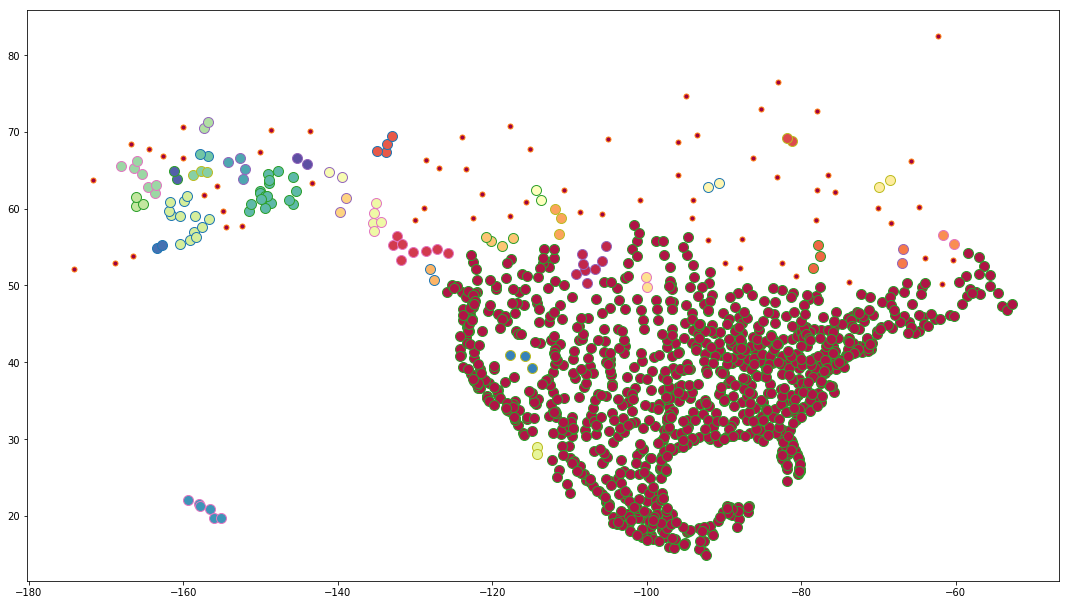

In [17]:
dbscanner(x, y, 2, 2)

# Million

In [18]:
million = usa[usa['pop'] > 1000000]

In [19]:
X = million[['lng','lat']]
x = million['lng']
y = million['lat']

In [20]:
lgn.scatter(x, y, labels = million['city'])

Silhouette Coefficient: 0.184
Estimated number of clusters: 9
Homogeneity: 0.506
Completeness: 0.968
V-measure: 0.664
[False False  True False  True False  True  True  True  True False  True
  True  True  True  True  True False  True  True  True False False False
  True  True False  True False  True False  True False False  True  True
  True False False  True False False  True  True  True]


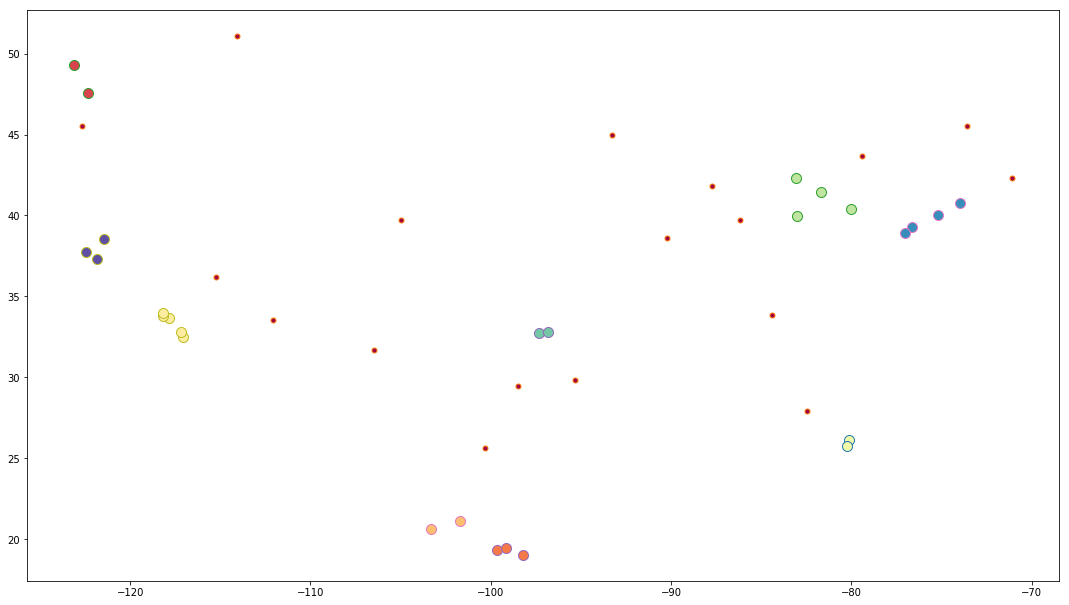

250 km


In [22]:
dbscanner(x, y, 2, 2)
print('250 km')

Silhouette Coefficient: 0.452
Estimated number of clusters: 7
Homogeneity: 0.511
Completeness: 0.984
V-measure: 0.673
[False False  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True]


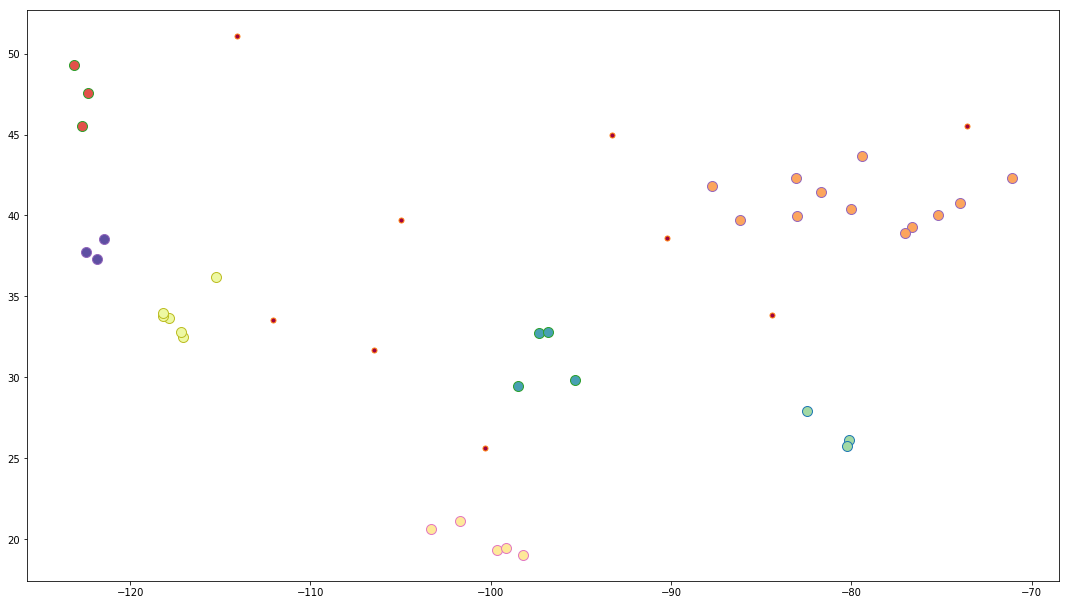

500 km


In [24]:
dbscanner(x, y, 4, 2)
print('500 km')

# Percent of population

In [25]:
usa['percent'] = usa['pop'] / usa['2016']

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
usa.sort_values('percent', ascending = False)

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,percent
"Toronto, Canada",CAN,36286425.0,Toronto,Toronto,43.699980,-79.420021,4573710.5,Canada,CA,CAN,Ontario,1.260447e-01
"Mexico City, Mexico",MEX,127540423.0,Mexico City,Mexico City,19.442442,-99.130988,14919501.0,Mexico,MX,MEX,Distrito Federal,1.169786e-01
"Montréal, Canada",CAN,36286425.0,Montréal,Montréal,45.499999,-73.583297,3017278.0,Canada,CA,CAN,Québec,8.315170e-02
"New York, United States of America",USA,323127513.0,New York,New York,40.749979,-73.980017,13524139.0,United States of America,US,USA,New York,4.185388e-02
"Vancouver, Canada",CAN,36286425.0,Vancouver,Vancouver,49.273417,-123.121644,1458415.0,Canada,CA,CAN,British Columbia,4.019175e-02
"Calgary, Canada",CAN,36286425.0,Calgary,Calgary,51.082992,-114.079998,1012661.0,Canada,CA,CAN,Alberta,2.790743e-02
"Ottawa, Canada",CAN,36286425.0,Ottawa,Ottawa,45.416697,-75.700015,978564.5,Canada,CA,CAN,Ontario,2.696778e-02
"Los Angeles, United States of America",USA,323127513.0,Los Angeles,Los Angeles,33.989978,-118.179980,8097410.0,United States of America,US,USA,California,2.505949e-02
"Edmonton, Canada",CAN,36286425.0,Edmonton,Edmonton,53.550025,-113.499982,885195.5,Canada,CA,CAN,Alberta,2.439467e-02
"Guadalajara, Mexico",MEX,127540423.0,Guadalajara,Guadalajara,20.670016,-103.330034,2919294.5,Mexico,MX,MEX,Jalisco,2.288917e-02


# All Cities

In [27]:
X = usa[['lng','lat']]
x = usa['lng']
y = usa['lat']

Silhouette Coefficient: -0.327
Estimated number of clusters: 32
Homogeneity: 0.120
Completeness: 0.999
V-measure: 0.215
[ True  True  True ...,  True  True  True]


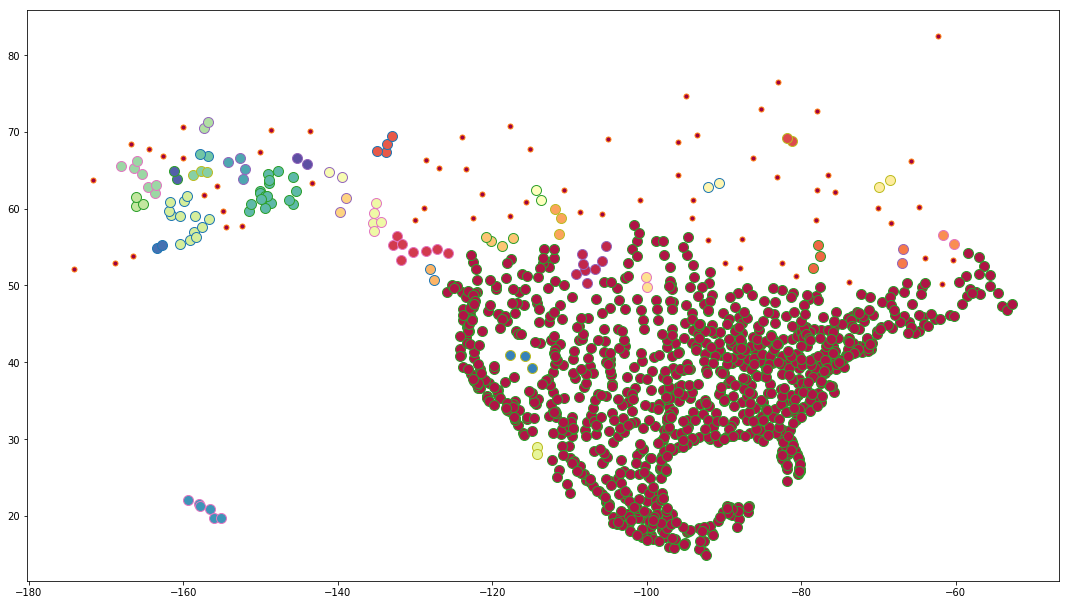

250 km


In [30]:
dbscanner(x, y, 2, 2)
print('250 km')

In [31]:
lgn.scatter(x, y, labels = usa['city'])

# 200,000

In [32]:
million = usa[usa['pop'] > 200000]

In [33]:
X = million[['lng','lat']]
x = million['lng']
y = million['lat']

In [34]:
lgn.scatter(x, y, labels = million['city'])

Silhouette Coefficient: 0.341
Estimated number of clusters: 26
Homogeneity: 0.530
Completeness: 0.993
V-measure: 0.691
[ True  True  True  True  True False False  True False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tru

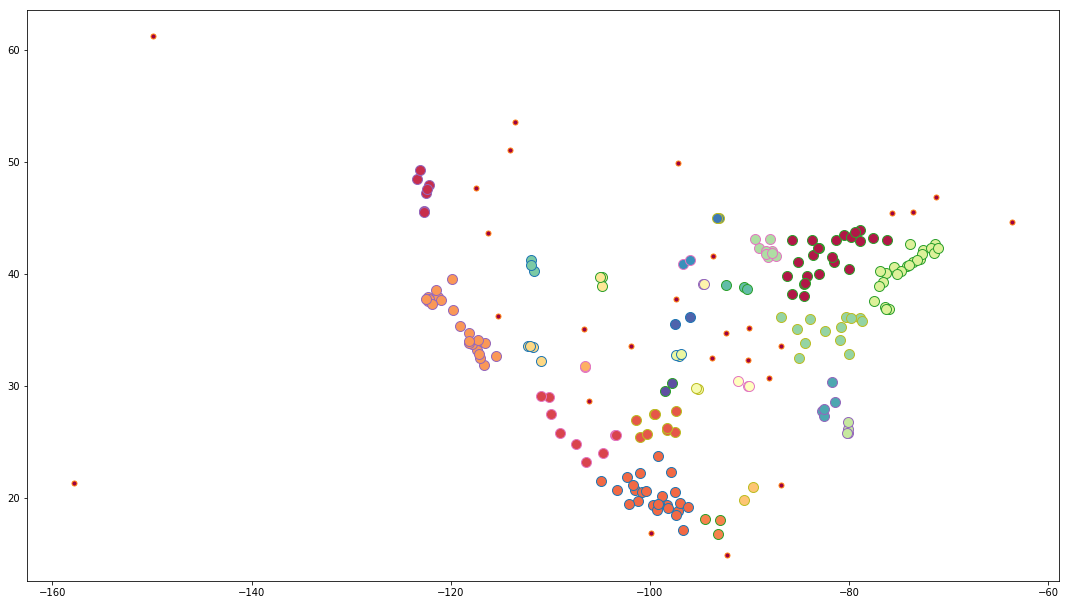

250 km


In [37]:
dbscanner(x, y, 2, 2)
print('250 km')

Silhouette Coefficient: 0.232
Estimated number of clusters: 13
Homogeneity: 0.342
Completeness: 0.993
V-measure: 0.509
[ True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tru

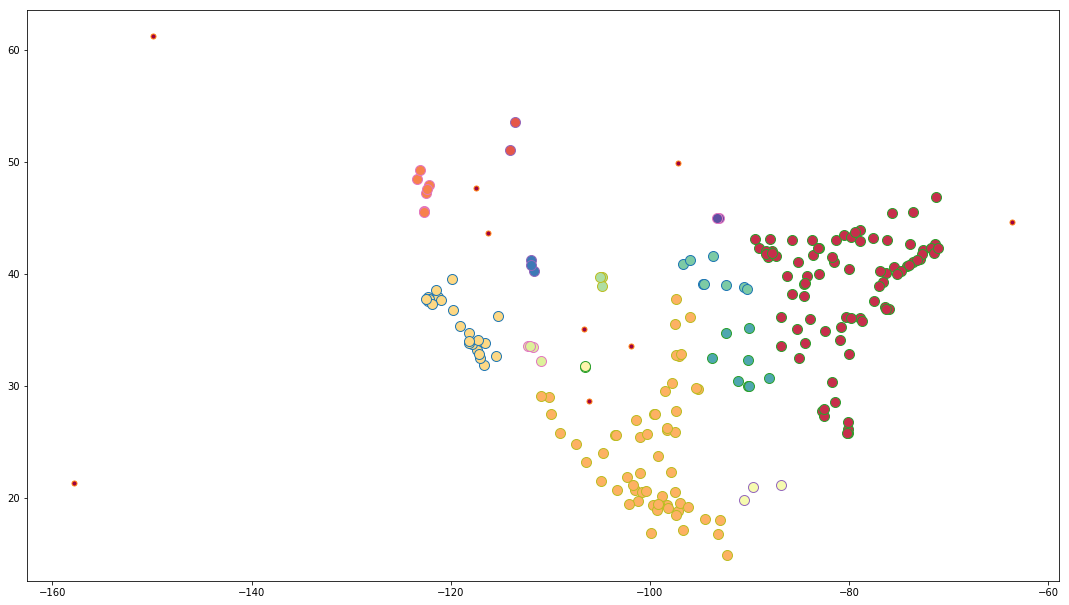

375 km


In [38]:
dbscanner(x, y, 3, 2)
print('375 km')

Silhouette Coefficient: -0.069
Estimated number of clusters: 6
Homogeneity: 0.107
Completeness: 1.000
V-measure: 0.194
[ True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tru

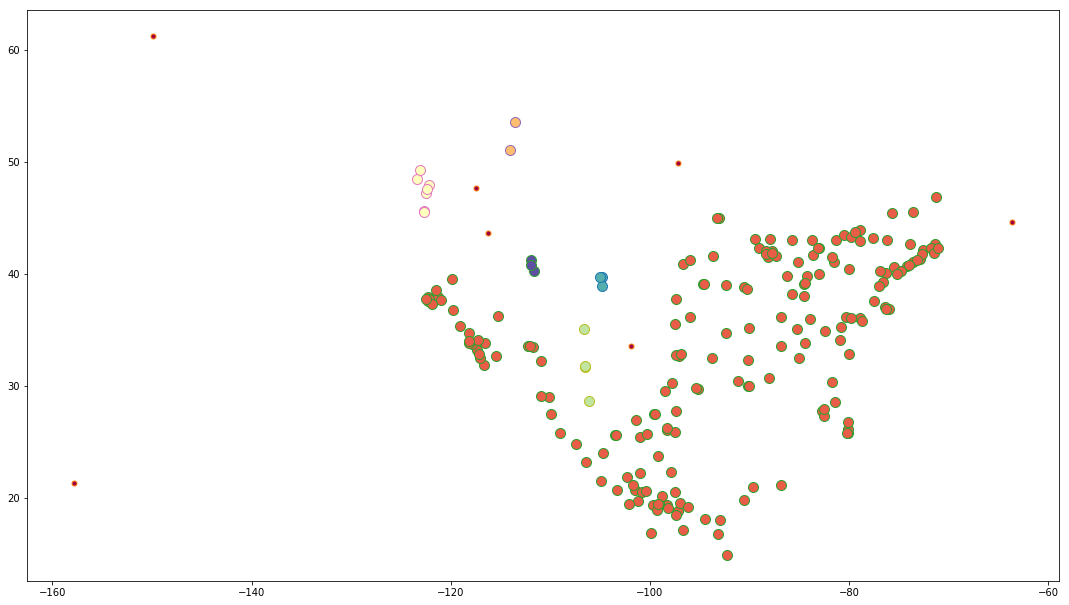

500 km


In [40]:
dbscanner(x, y, 4, 2)
print('500 km')

# Cascadia

In [43]:
pnw = ['Washington', 'Oregon', 'British Columbia']
pnw = df[df['province'].isin(pnw)]
X = pnw[['lng','lat']]
y = pnw['lat']
x = pnw['lng']
labels = pnw['city']
pnw.sort_values('pop', ascending = False)

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,US,USA,Washington
"Vancouver, Canada",CAN,36286425.0,Vancouver,Vancouver,49.273417,-123.121644,1458415.0,Canada,CA,CAN,British Columbia
"Portland, United States of America",USA,323127513.0,Portland,Portland,45.520024,-122.679990,1207756.5,United States of America,US,USA,Oregon
"Tacoma, United States of America",USA,323127513.0,Tacoma,Tacoma,47.211316,-122.515013,460273.0,United States of America,US,USA,Washington
"Vancouver, United States of America",USA,323127513.0,Vancouver,Vancouver,45.630301,-122.639993,343796.5,United States of America,US,USA,Washington
"Everett, United States of America",USA,323127513.0,Everett,Everett,47.960417,-122.199968,291948.0,United States of America,US,USA,Washington
"Spokane, United States of America",USA,323127513.0,Spokane,Spokane,47.669996,-117.419949,272483.5,United States of America,US,USA,Washington
"Victoria, Canada",CAN,36286425.0,Victoria,Victoria,48.433283,-123.350001,270491.5,Canada,CA,CAN,British Columbia
"Eugene, United States of America",USA,323127513.0,Eugene,Eugene,44.050010,-123.100016,195183.0,United States of America,US,USA,Oregon
"Salem, United States of America",USA,323127513.0,Salem,Salem,44.928070,-123.023897,187966.0,United States of America,US,USA,Oregon


In [46]:
lgn.scatter(x, y, labels = pnw['city'])

Silhouette Coefficient: 0.464
Estimated number of clusters: 1
Homogeneity: 0.019
Completeness: 1.000
V-measure: 0.037
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


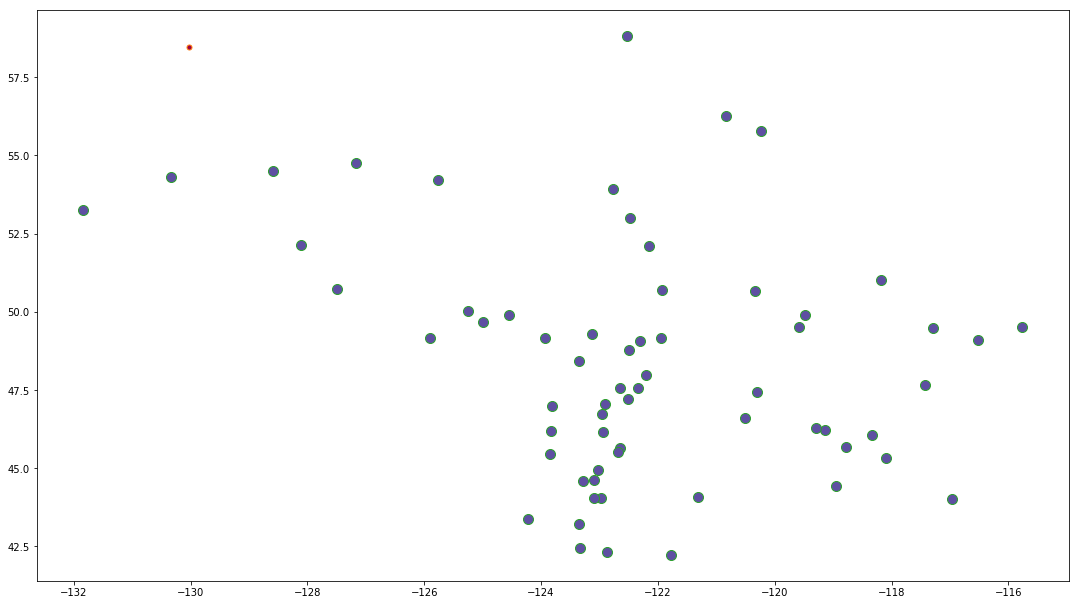

500 km


In [44]:
dbscanner(x, y, 4, 2)
print('500 km')

In [48]:
million = pnw[pnw['pop'] > 200000]
X = million[['lng','lat']]
y = million['lat']
x = million['lng']
labels = million['city']
lgn.scatter(x, y, labels = million['city'])

Silhouette Coefficient: 0.587
Estimated number of clusters: 1
Homogeneity: 0.181
Completeness: 1.000
V-measure: 0.307
[ True  True  True  True False  True  True  True]


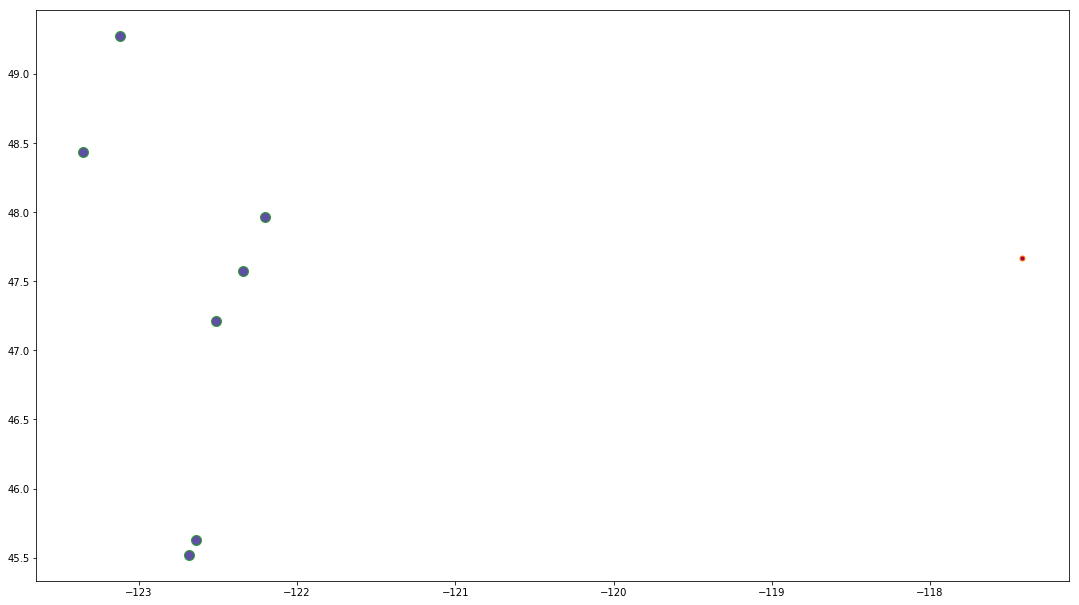

500 km


In [49]:
dbscanner(x, y, 4, 2)
print('500 km')

In [52]:
million = pnw[pnw['pop'] > 100000]
X = million[['lng','lat']]
y = million['lat']
x = million['lng']
labels = million['city']
lgn.scatter(x, y, labels = million['city'])

Silhouette Coefficient: 0.464
Estimated number of clusters: 1
Homogeneity: 0.106
Completeness: 1.000
V-measure: 0.191
[ True  True  True  True  True  True  True  True False  True  True  True
  True]


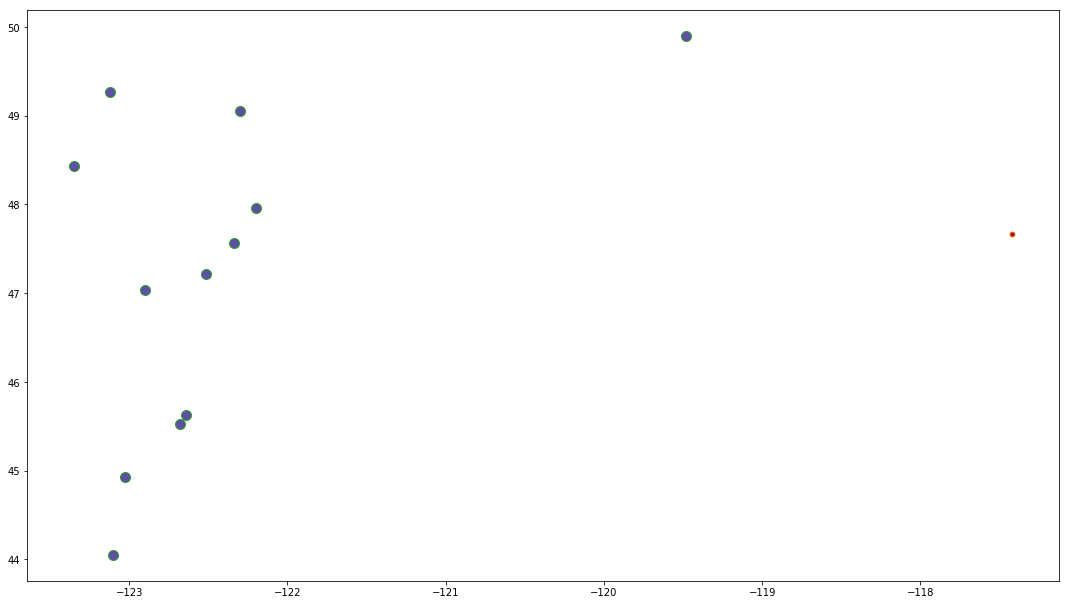

500 km


In [54]:
dbscanner(x, y, 3, 2)
print('500 km')

In [55]:
million = pnw[pnw['pop'] > 50000]
X = million[['lng','lat']]
y = million['lat']
x = million['lng']
labels = million['city']
lgn.scatter(x, y, labels = million['city'])

Silhouette Coefficient: 0.488
Estimated number of clusters: 1
Homogeneity: 0.050
Completeness: 1.000
V-measure: 0.095
[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


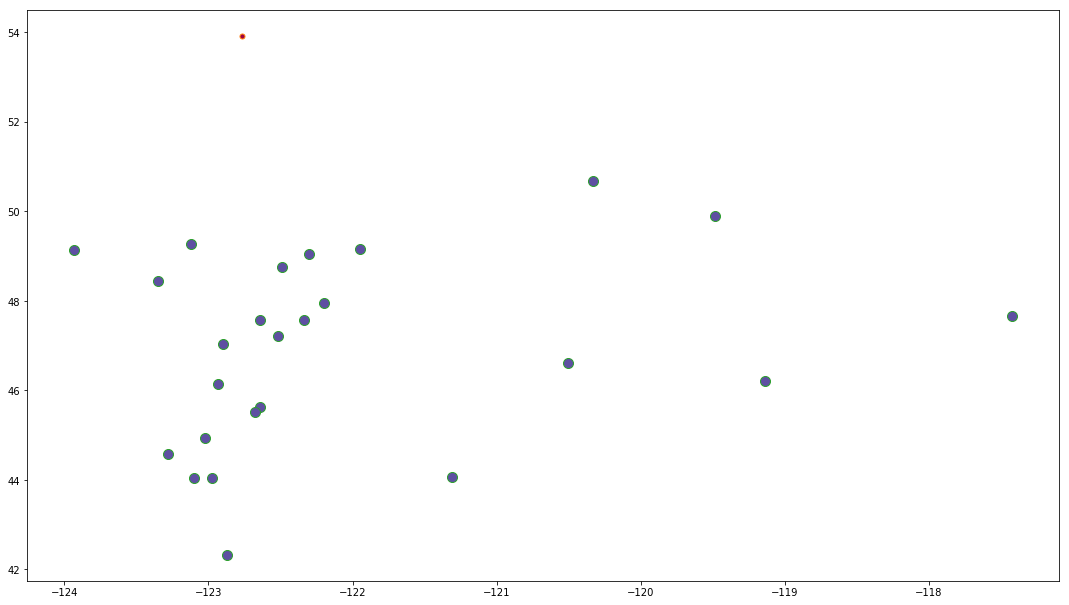

500 km


In [56]:
dbscanner(x, y, 3, 2)
print('500 km')